# Perdiction of sales

### Problem Statement
The dataset represents sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store are available. The aim is to build a predictive model and find out the sales of each product at a particular store.

|Variable|Description|
|: ------------- |:-------------|
|Item_Identifier|Unique product ID|
|Item_Weight|Weight of product|
|Item_Fat_Content|Whether the product is low fat or not|
|Item_Visibility|The % of total display area of all products in a store allocated to the particular product|
|Item_Type|The category to which the product belongs|
|Item_MRP|Maximum Retail Price (list price) of the product|
|Outlet_Identifier|Unique store ID|
|Outlet_Establishment_Year|The year in which store was established|
|Outlet_Size|The size of the store in terms of ground area covered|
|Outlet_Location_Type|The type of city in which the store is located|
|Outlet_Type|Whether the outlet is just a grocery store or some sort of supermarket|
|Item_Outlet_Sales|Sales of the product in the particulat store. This is the outcome variable to be predicted.|

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

In [2]:
import pandas as pd
import numpy as np

In [3]:
train_df = pd.read_csv('./Train.csv')

In [5]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
train_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [9]:
X_all = train_df.drop(['Item_Identifier','Item_Outlet_Sales'],axis=1)

In [10]:
X_all.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [19]:
X_numeric = X_all[['Item_Weight','Item_Visibility','Item_MRP']]

In [20]:
X_categorical = X_all[['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']]

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [22]:
X_numeric_scaled = sc.fit_transform(X_numeric)

In [25]:
X_numeric_scaled

,Item_Weight,Item_Visibility,Item_MRP
0,-0.766217,-0.970732,1.747454
1,-1.494175,-0.908111,-1.489023
2,0.999834,-0.956917,0.010040
3,1.365966,-1.281758,0.660050
4,-0.845905,-1.281758,-1.399220
...,...,...,...
8518,-1.290648,-0.181193,1.180783
8519,-0.964360,-0.371154,-0.527301
8520,-0.486234,-0.599784,-0.897208
8521,-1.216345,1.532880,-0.607977


In [24]:
X_numeric_scaled = pd.DataFrame(X_numeric_scaled,columns = X_numeric.columns)

In [27]:
X_categorical_ohc = pd.get_dummies(X_categorical)

In [28]:
from sklearn.decomposition import PCA


In [29]:
pca = PCA(n_components =7)

In [30]:
X_categorical_final = pca.fit_transform(X_categorical_ohc)

In [33]:
X_categorical_final = pd.DataFrame(X_categorical_final,columns = ['pca1','pca2','pca3','pca4','pca5','pca6','pca7'])

In [34]:
X_categorical_final

,pca1,pca2,pca3,pca4,pca5,pca6,pca7
0,-0.055126,0.739109,-0.610527,-0.935113,0.704242,0.011346,0.389963
1,1.404229,0.040076,0.818316,-0.287331,-0.279533,1.007570,-0.290442
2,-0.049051,0.741968,-0.581436,-0.937907,0.693055,-0.000044,0.390198
3,0.745039,0.077787,0.932037,0.970644,-0.457256,0.008374,0.839820
4,0.275379,-0.702126,-0.589142,0.849064,1.150379,-0.010061,-0.170762
...,...,...,...,...,...,...,...
8518,0.276701,-0.680107,-0.409570,0.826685,1.144437,-0.010605,-0.175588
8519,-0.728372,-0.633101,0.986436,-0.311236,-0.141748,0.005339,0.362282
8520,-1.060382,-0.374797,-0.539934,0.061482,-0.550701,-0.011054,-0.688704
8521,1.407630,0.050586,0.885676,-0.301399,-0.284975,0.999853,-0.298035


In [46]:
X_final = pd.concat([X_numeric_scaled,X_categorical_final],axis=1)

In [64]:
X_final['Outlet_Establishment_Year']=train_df['Outlet_Establishment_Year']

X_final['Item_Outlet_Sales']=train_df['Item_Outlet_Sales']

In [66]:
X_final.dropna(inplace=True)
y = X_final['Item_Outlet_Sales']
X_final.drop(['Item_Outlet_Sales'],axis=1,inplace=True)

In [67]:
from sklearn.model_selection import train_test_split

In [124]:
X_train,X_test,y_train,y_test = train_test_split(X_final,y,train_size=0.8,random_state=0)

We have covered data preparation and feature engineering two weeks ago. Now, it's time to do some predictive models.

## Model Building

## Task
Make a baseline model. Baseline model is the one which requires no predictive model and its like an informed guess. For instance, predict the sales as the overall average sales or just zero.
Making baseline models helps in setting a benchmark. If your predictive algorithm is below this, there is something going seriously wrong and you should check your data.

In [125]:
X_train.shape

(5648, 11)

In [126]:
X_test.shape

(1412, 11)

In [127]:
y_train.shape

(5648,)

In [128]:
from sklearn.linear_model import Ridge

In [129]:
rr = Ridge(alpha=1)

In [130]:
rr.fit(X_train,y_train)

Ridge(alpha=1)

In [131]:
y_pred = rr.predict(X_test)

In [132]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [133]:
mean_absolute_error(y_test,y_pred)

797.5479666469599

In [135]:
y_test

3184    3280.3966
3590    6641.3550
3496    2366.9190
1077    1088.5830
3696     439.4280
          ...    
1624    5528.1374
4781    2784.3756
5922    3048.6982
3964    2077.2960
1980    5331.7264
Name: Item_Outlet_Sales, Length: 1412, dtype: float64

In [136]:
y_pred

array([3943.77227684, 3127.91682819, 3856.46331377, ..., 2627.35760997,
       1797.49193989, 3775.34345677])

In [137]:
import matplotlib.pyplot as plt
%matplotlib inline

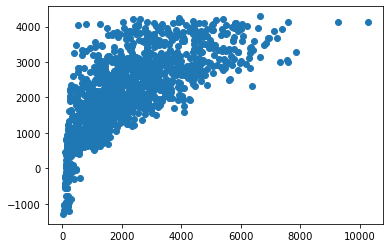

In [138]:
plt.scatter(y_test,y_pred)

In [134]:
r2_score(y_test,y_pred)

0.502117083673888

In [139]:
error_df= pd.DataFrame()

In [140]:
error_df['Actual']=y_test
error_df['Predicted']=y_pred

In [142]:
error_df['error'] = error_df['Actual']-error_df['Predicted']

In [145]:
error_df.sort_values(['error'])

,Actual,Predicted,error
895,527.3136,4049.810332,-3522.496732
1463,788.9730,4065.440929,-3276.467929
7322,452.7440,3484.029473,-3031.285473
6726,396.8168,3267.822770,-2871.005970
2656,1281.6650,4086.809281,-2805.144281
...,...,...,...
3083,7534.1928,3070.857439,4463.335361
753,7833.8028,3296.016785,4537.786015
2516,7590.1200,2990.243545,4599.876455
997,9275.9256,4130.592235,5145.333365


In [146]:
error_df['error'].median()

-61.2224996586001

In [147]:
error_df['error'].mean()

53.53744586316579

## Task
Split your data in 80% train set and 20% test set.

## Task
Use grid_search to find the best value of parameter `alpha` for Ridge and Lasso regressions from `sklearn`.

## Task
Using the model from grid_search, predict the values in the test set and compare against the benchmark.